___
<h1 style="color:blue;">Principal Component Analysis (PCA)</h1>

___


## Introduction to Principal Component Analysis (PCA)

The Principal Component Analysis (PCA) is a dimensionality reduction technique that is widely used in machine learning and data analysis. It is used to transform high-dimensional data into a lower-dimensional space while preserving as much variance as possible. PCA achieves this by finding the principal components of the data, which are the directions along which the data varies the most.

## Key Concepts

### 1. Principal Components
Principal components are the orthogonal vectors that represent the directions of maximum variance in the data. The first principal component captures the most variance, the second principal component captures the second most variance, and so on. The number of principal components is equal to the number of original features in the data.

### 2. Eigenvalues and Eigenvectors
PCA involves computing the eigenvectors and eigenvalues of the covariance matrix of the data. The eigenvectors represent the principal components, and the eigenvalues represent the amount of variance captured by each principal component.

### 3. Covariance Matrix
The covariance matrix is a square matrix that summarizes the covariances between pairs of features in the data. It is used to compute the eigenvectors and eigenvalues in PCA.

### 4. Dimensionality Reduction
PCA reduces the dimensionality of the data by projecting it onto a lower-dimensional subspace spanned by the principal components. This reduces the number of features while retaining as much variance as possible.


## Algorithm

The PCA algorithm can be summarized in the following steps:

1. Standardize the data by subtracting the mean and dividing by the standard deviation.
2. Compute the covariance matrix of the standardized data.
3. Compute the eigenvectors and eigenvalues of the covariance matrix.
4. Sort the eigenvectors by decreasing eigenvalues to rank the principal components.
5. Select the top k eigenvectors to form the matrix W.
6. Project the data onto the new subspace spanned by the top k eigenvectors by multiplying the data by W.
7. The transformed data represents the lower-dimensional representation of the original data.

## Iris Dataset Overview

### Description
The Iris dataset is a classic and well-known dataset in machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher in 1936. The dataset is often used for demonstrating various machine learning algorithms and statistical techniques due to its simplicity and effectiveness in testing classification problems.

### Content
The Iris dataset consists of 150 instances, where each instance represents a different iris flower. There are three classes (species) of iris plants in the dataset, each represented by 50 instances:
- Iris Setosa
- Iris Versicolor
- Iris Virginica

For each instance, the following four features are recorded:
1. Sepal Length (in cm)
2. Sepal Width (in cm)
3. Petal Length (in cm)
4. Petal Width (in cm)

### Purpose
The main purpose of the Iris dataset is to test classification algorithms. Given the four features of an iris flower, the goal is to predict its species among the three classes. This dataset is particularly useful for:
- Demonstrating supervised learning algorithms (e.g., classification) due to the labeled nature of the dataset.
- Illustrating data visualization techniques such as scatter plots, pair plots, and decision boundaries.
- Evaluating model performance using metrics like accuracy, precision, recall, and F1-score.

### Source
The dataset is readily available in various machine learning libraries and repositories, including:
- Scikit-learn: `sklearn.datasets.load_iris()`
- UCI Machine Learning Repository: [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris)



___
## <span style="color:blue;">Data Exploration and Preprocessing</span>

___


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame for better visualization (optional)
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


>  Making Histograms of the data to understand the distribution of the data.

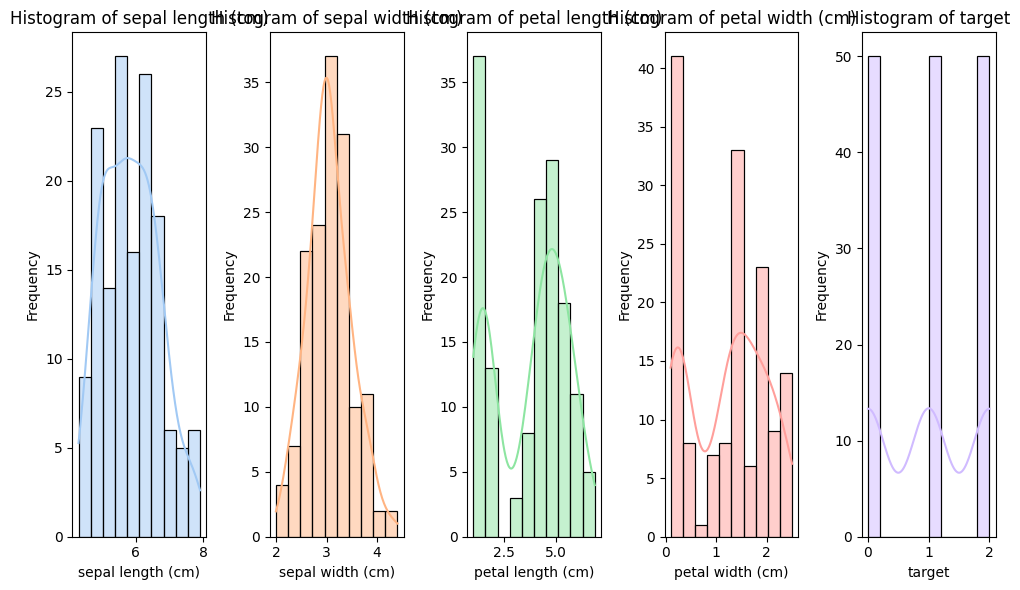

In [2]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(1,5, i + 1)
    sns.histplot(df[col], bins=10, kde=True, color=palette[i], edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

> Making box plots to understand the spread of the data.

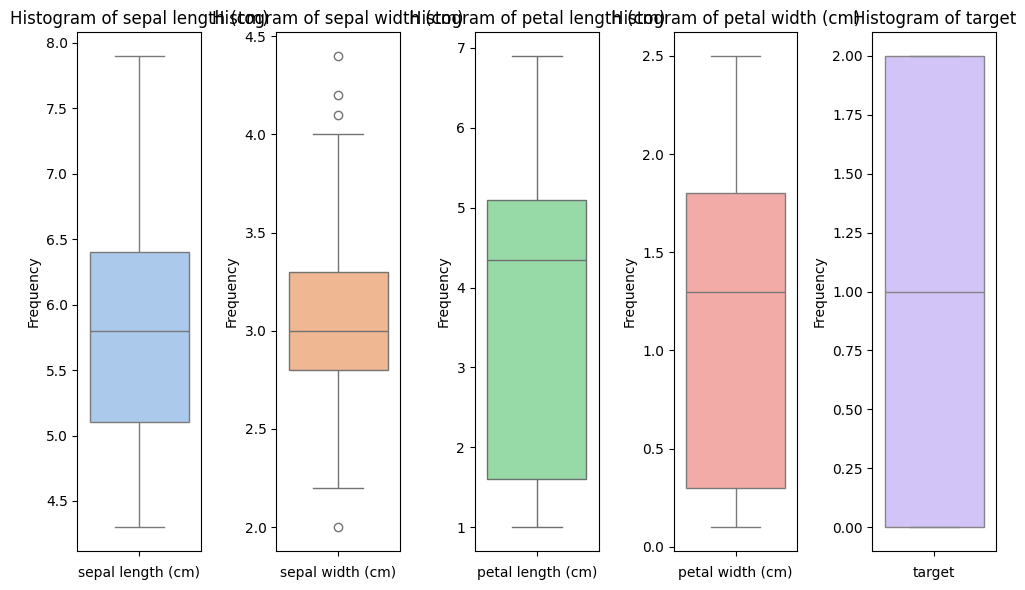

In [3]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Define a color palette with different colors for each column
palette = sns.color_palette('pastel', len(df.columns))

# Iterate through each column and plot a histogram with a different color
for i, col in enumerate(df.columns):
    plt.subplot(1, 5, i + 1)
    sns.boxplot(df[col], color=palette[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

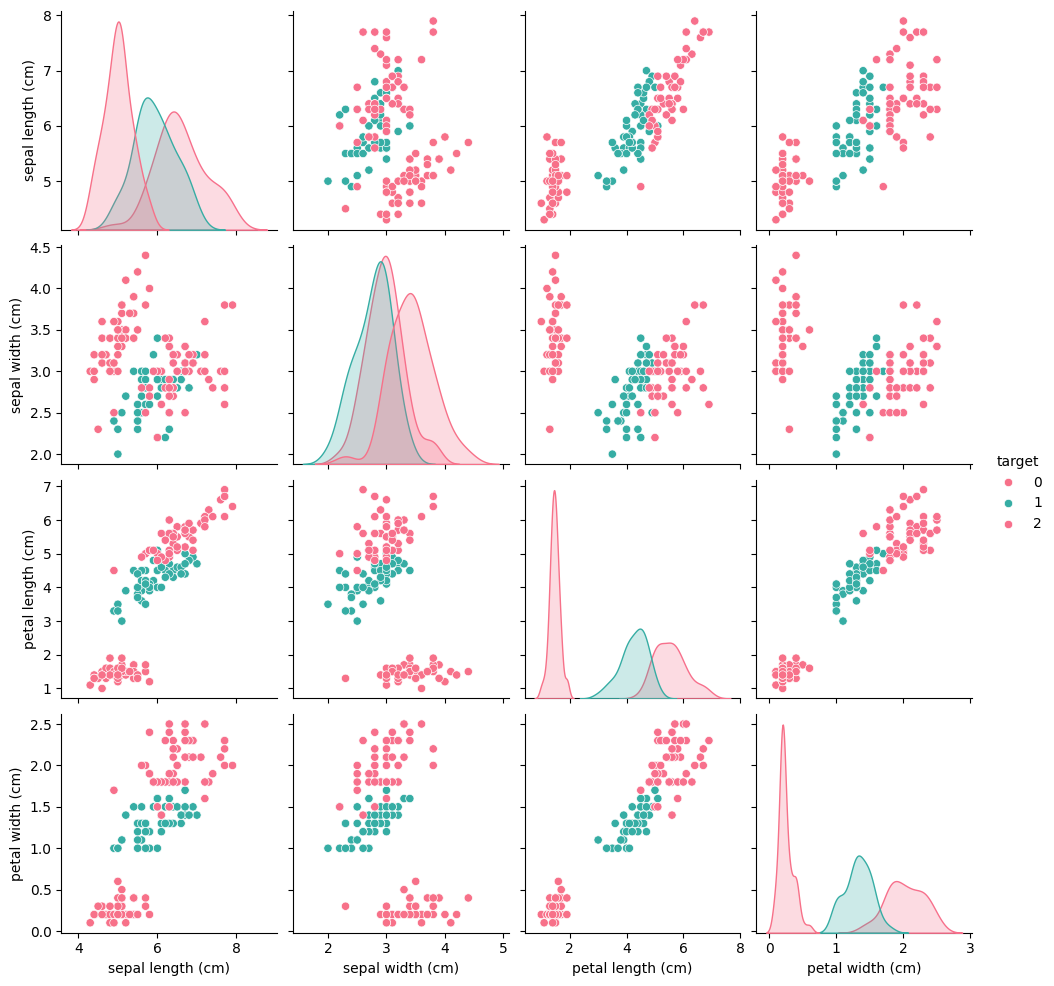

In [4]:
# pairplot
sns.pairplot(df, hue='target', palette='husl')

### Correlation Analysis

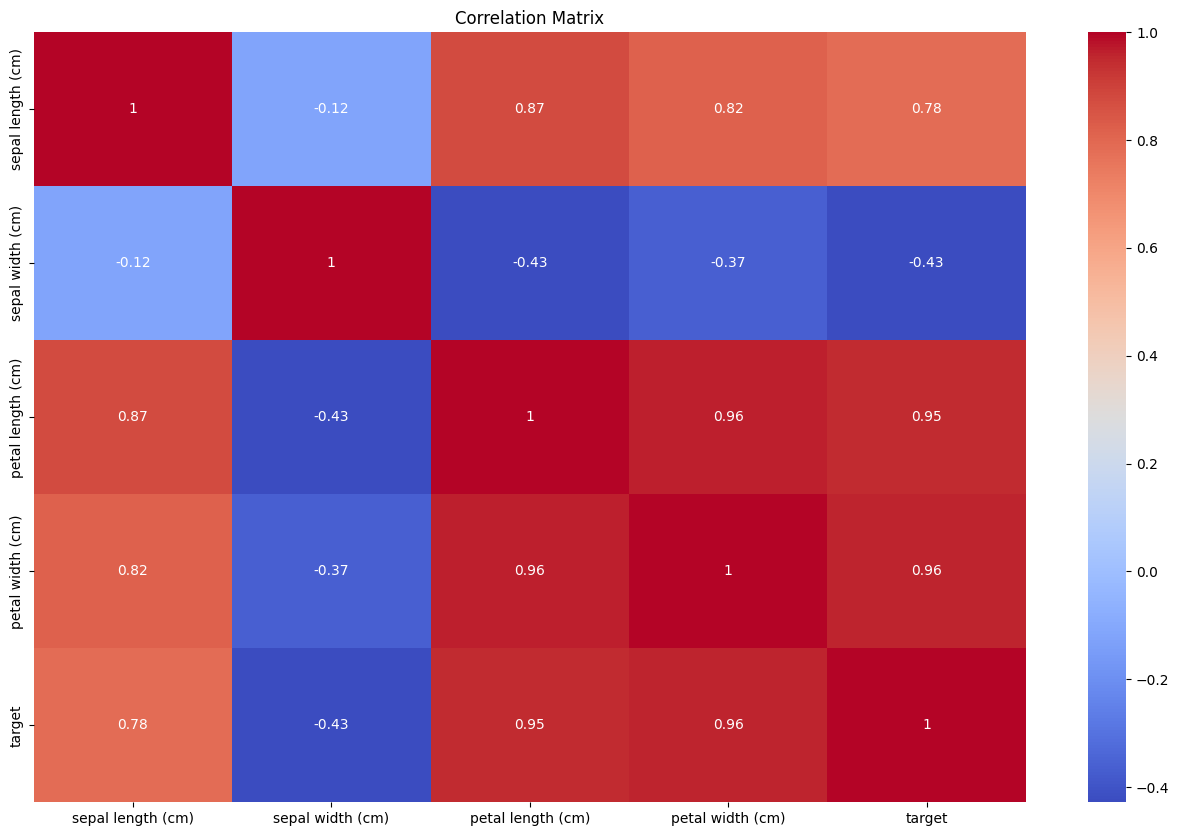

In [5]:
# Calculating the Correlation 
correlation = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

___
## <span style="color:blue;">Model Development</span>
___

### Scikit-learn Gaussian Mixture Clustering Model:

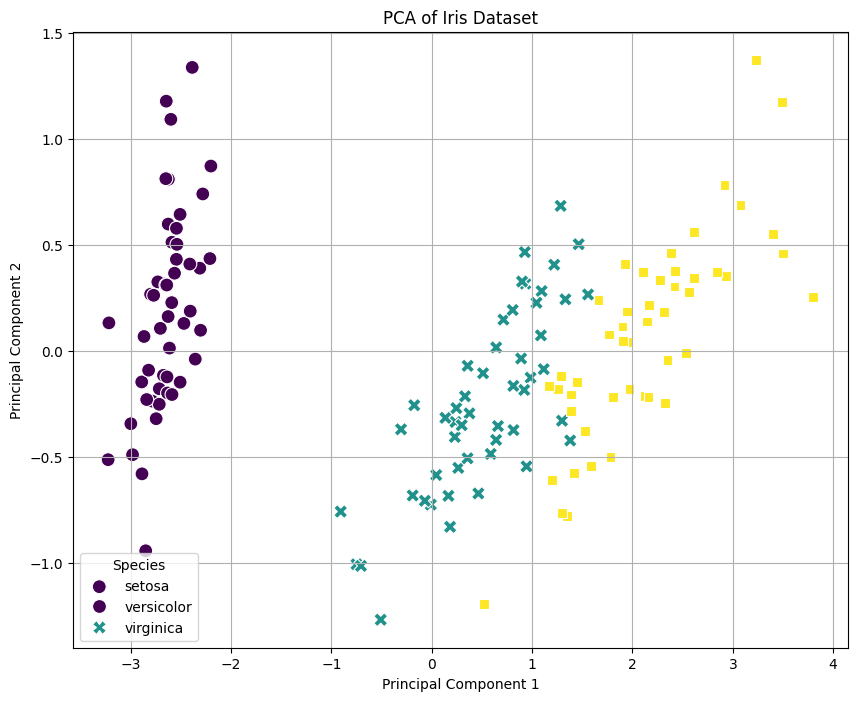

In [6]:
# Perform PCA
# Initialize PCA to reduce the dataset to 2 principal components
pca = PCA(n_components=3)
# Fit the PCA model to the data (excluding the target column) and transform the data
principal_components = pca.fit_transform(df.iloc[:, :-1])

# Create a DataFrame with the principal components
# Columns are named 'PC1' and 'PC2'
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# Add the target labels back to the DataFrame with the principal components
principal_df['target'] = df['target']

# Visualize the PCA result with clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='target', palette='viridis', data=principal_df, s=100, style='target')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species', labels=iris.target_names)
plt.grid(True)
plt.show()

___
## <span style="color:blue;">Model Evaluation</span>

___

Explained Variance Ratio: [0.92461872 0.05306648 0.01710261]
Cumulative Explained Variance: [0.92461872 0.97768521 0.99478782]


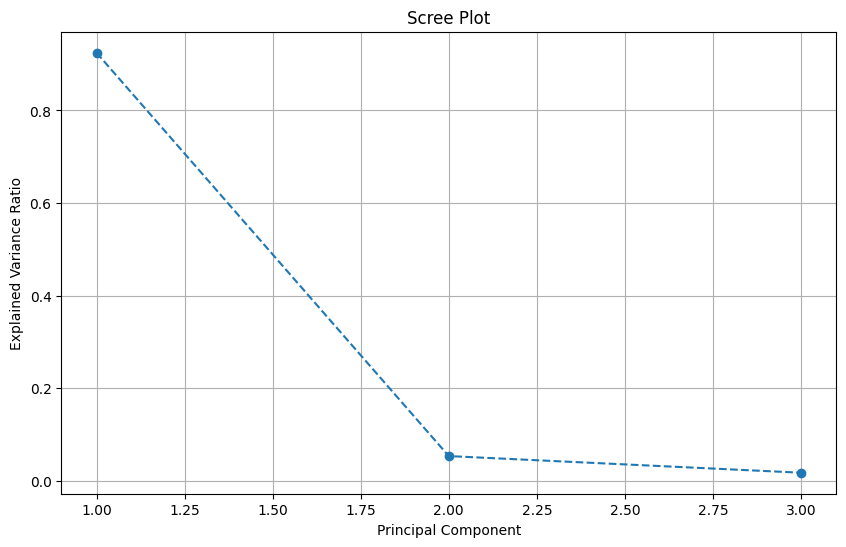

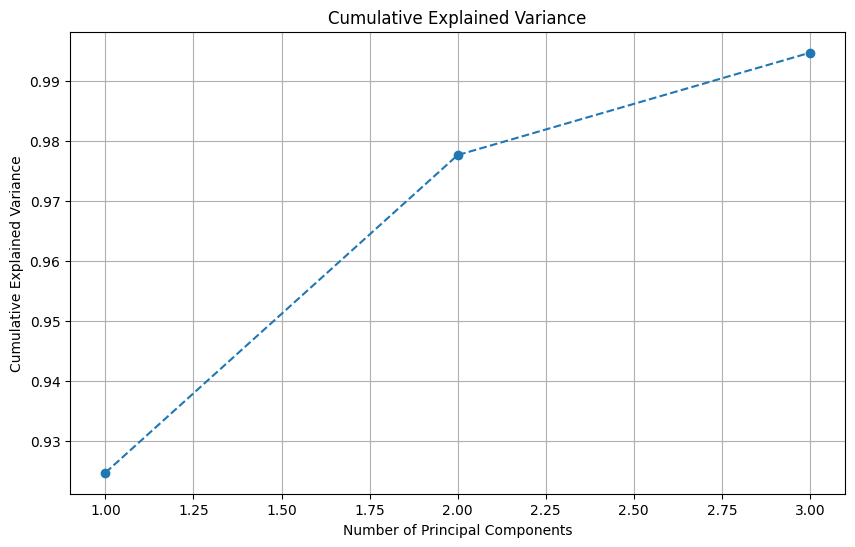

In [7]:
# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Cumulative Explained Variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative Explained Variance Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()






___
## <span style="color:blue;">CONCLUSION</span>

___

### Summary of PCA Evaluation

The Principal Component Analysis (PCA) was performed on the Iris dataset to reduce its dimensionality while retaining most of the variance. Here are the key findings from the PCA analysis:

- **Explained Variance Ratio**:
  - The first principal component (PC1) explains approximately 92.46% of the total variance.
  - The second principal component (PC2) explains an additional 5.31% of the variance.
  - The third principal component (PC3) explains a further 1.71% of the variance.

- **Cumulative Explained Variance**:
  - The first two principal components together explain approximately 97.77% of the total variance.
  - The first three principal components together explain approximately 99.48% of the total variance.

### Insights and Recommendations

Based on the evaluation metrics:

- The first principal component captures the majority of the variance in the dataset, making it highly significant for reducing dimensionality.
- The first two principal components together capture nearly all the variance, indicating that they are sufficient for most practical purposes of dimensionality reduction and data visualization.
- For further analysis or visualization, using the first two principal components will provide a comprehensive understanding of the dataset while significantly reducing its dimensionality.

### Acknowledgments

- **Data Source**: The Iris dataset used in this analysis is publicly available and was sourced from the UCI Machine Learning Repository.
- **Tools**: Python, Scikit-learn, Pandas, Matplotlib, and Seaborn were instrumental in data preprocessing, PCA model development, and evaluation.

Overall, PCA has proven to be an effective method for reducing the dimensionality of the Iris dataset while retaining the majority of its variance, making it a valuable tool for subsequent data analysis and visualization tasks.